In [165]:
# libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore') #ignore warning in the output

# A  Dive into the Labor Party's Performance in Israeli Elections

In the ever-changing landscape of Israeli politics, our goal is to understand what's driving the Labor Party's success or struggles in recent elections. We'll look at how people are voting, how their economic status influences their choices, and why some voters may be switching sides. Our aim is to offer useful insights that can help political decision-makers plan their strategies more effectively, specificity for the labor party.

## Analysis and Comparison of Voting Percentages for the Labor Party

### Sample Data vs. Predictions with 100% Voting

In this section, I compare the actual voting percentages for the Labor Party with simulated predictions based on 100% voter turnout.

#### Analysis of the 2021 Election

Let's begin by examining the voting trends observed during the 2021 election.


In [166]:
# Load the 2021 city and per-ballot data

per_city_2021 = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\city24.xlsx")
per_ballot_2021 = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\Kalpiot_24.xlsx")

# Remove non-relevent ballots
per_city_2021 = per_city_2021[per_city_2021["שם ישוב"] != "מעטפות חיצוניות"]
per_ballot_2021 = per_ballot_2021[per_ballot_2021["שם ישוב"] != "מעטפות חיצוניות"]

In [167]:
# Let's take a quick look at both data frames 
per_city_2021.head()

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
0,6,אבירים,1220,221,151,1,150,47,0,0,...,0,0,0,0,5,0,0,0,1,8
1,5,אדירים,113,234,180,0,180,1,7,4,...,0,0,0,0,2,0,0,0,61,6
2,8,אושה,278,382,276,0,276,72,7,0,...,0,0,0,0,1,0,0,0,0,15
3,17,אחווה,1157,183,145,0,145,14,4,0,...,0,0,0,0,0,0,0,0,2,8
4,17,איבים,338,138,40,0,40,0,4,0,...,0,0,1,0,0,0,0,0,1,0


 Each row of the dataset contains information about a specific city or locality, including its name, unique code ("semel yishuv"), the total number of eligible voters ("בזב"), the number of voters who participated in the election, the count of disqualified votes, the number of valid ("kosher") votes, and the distribution of votes among all political parties.

In [168]:
per_ballot_2021.head()

,סמל ועדה,ברזל,שם ישוב,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
0,6,3238,אבירים,1220,1.0,1,0,221,151,1,...,0,0,0,0,5,0,0,0,1,8
1,5,1788,אדירים,113,1.0,1,0,234,180,0,...,0,0,0,0,2,0,0,0,61,6
2,8,4113,אושה,278,1.0,1,0,382,276,0,...,0,0,0,0,1,0,0,0,0,15
3,17,10449,אחווה,1157,1.0,1,0,183,145,0,...,0,0,0,0,0,0,0,0,2,8
4,17,10450,איבים,338,1.0,1,0,138,40,0,...,0,0,1,0,0,0,0,0,1,0


same kind of features but on the ballot level so we have another column called "קלפי" 

#### Define party name mappings


In [169]:
party_real_name_list = ["ליכוד", "יש עתיד", "שס", "כחול לבן","ימינה", "עבודה", "יהדות התורה","ישראל ביתנו","ציונות דתית","משותפת","תקווה חדשה","מרצ","רעמ"]
short_name_list = ["מחל","פה","שס","כן","ב","אמת","ג","ל","ט","ודעם","ת","מרצ","עם"]
party_dict = {}
for i in range(len(short_name_list)):
    party_dict[short_name_list[i]] = party_real_name_list[i]

In [170]:
party_dict

{'מחל': 'ליכוד',
 'פה': 'יש עתיד',
 'שס': 'שס',
 'כן': 'כחול לבן',
 'ב': 'ימינה',
 'אמת': 'עבודה',
 'ג': 'יהדות התורה',
 'ל': 'ישראל ביתנו',
 'ט': 'ציונות דתית',
 'ודעם': 'משותפת',
 'ת': 'תקווה חדשה',
 'מרצ': 'מרצ',
 'עם': 'רעמ'}

In [171]:
# rename party names in data frame per_city_2021
per_city_2021_parties = per_city_2021.iloc[:,7:]
per_city_2021_parties = per_city_2021_parties.rename(columns=party_dict)

In [188]:
per_city_2021_parties[party_dict.values()].head()

,ליכוד,יש עתיד,שס,כחול לבן,ימינה,עבודה,יהדות התורה,ישראל ביתנו,ציונות דתית,משותפת,תקווה חדשה,מרצ,רעמ
0,7.317881,39.516556,1.463576,23.417219,0.000000,68.788079,0.0,2.927152,2.927152,4.390728,11.708609,45.370861,0.0
1,109.200000,2.600000,79.300000,3.900000,9.100000,1.300000,5.2,0.000000,11.700000,0.000000,7.800000,0.000000,0.0
2,33.217391,119.028986,0.000000,51.210145,9.688406,99.652174,0.0,11.072464,0.000000,4.152174,20.760870,27.681159,0.0
3,34.075862,46.696552,2.524138,45.434483,5.048276,17.668966,0.0,3.786207,5.048276,0.000000,10.096552,12.620690,0.0
4,58.650000,0.000000,3.450000,17.250000,13.800000,0.000000,0.0,0.000000,34.500000,0.000000,0.000000,0.000000,0.0


#### creating simulated voting data based on 100 % Voter turnout


In [173]:
# take meta data and calculat precentage of voters per city 

meta_data_vote = per_city_2021.iloc[:,1:5]

meta_data_vote["אחוז מצביעים"] = meta_data_vote["מצביעים"] / meta_data_vote["בזב"]

# Lets show top 5 city with highest precentage of voters per city 

meta_data_vote.sort_values("אחוז מצביעים",ascending = False).head()

,שם ישוב,סמל ישוב,בזב,מצביעים,אחוז מצביעים
347,יסודות,440,339,312,0.920354
257,אליאב,1365,262,240,0.916031
737,גני טל,1371,439,397,0.904328
105,באר מילכה,1278,101,90,0.891089
992,רחלים,3822,346,308,0.890173


#### Normalize number of votes by voter turnout percentage


In [174]:
for row in range(len(per_city_2021_parties)):
    per_city_2021_parties.loc[row] = per_city_2021_parties.loc[row]/meta_data_vote["אחוז מצביעים"][row]

In [175]:
# Calculate the total number of votes
number_of_all_votes = votes.values.sum()

# Initialize a dictionary to store the percentage of votes for each party
dict_for_pj_all_vote = {}

# Calculate the percentage of votes for each party
for party in votes.columns:
    # Reverse the party name for readability and store its percentage of votes in the dictionary
    dict_for_pj_all_vote[party[::-1]] = votes[party].sum() / number_of_all_votes
city_projected_top_13 = dict(sorted(dict_for_pj_all_vote.items(), key=lambda x: x[1], reverse=True)[:13])

#### Top 13  Partys for year 2021 using city level data - Projected Data


In [176]:
# Determine the top 13 parties by 100 % projected voting percentages across all cities data
city_projected_top_13 = dict(sorted(dict_for_pj_all_vote.items(), key=lambda x: x[1], reverse=True)[:13])
projected_top_13_per_city1 = {key[::-1]: value for key, value in city_projected_top_13.items()}
projected_top_13_per_city1 = {key[::-1]: round(value, 3) for key, value in projected_top_13_per_city.items()}

# Convert the dictionary to a DataFrame
df_projected_top_13 = pd.DataFrame.from_dict(projected_top_13_per_city1, orient='index', columns=['Percentage'])

# Reset index to have the party names as a column
df_projected_top_13.reset_index(inplace=True)
# Rename the columns
df_projected_top_13.columns = ['Party', 'Percentage']
df_projected_top_13

,Party,Percentage
0,ליכוד,0.239
1,יש עתיד,0.133
2,שס,0.071
3,משותפת,0.067
4,כחול לבן,0.063
5,ישראל ביתנו,0.057
6,עבודה,0.055
7,ימינה,0.055
8,יהדות התורה,0.054
9,רעמ,0.054


#### Top 13  Partys for year 2021 using city level data - Sample Data


In [177]:
# Calculate the voting percentages for the Labor Party and other parties based on sample votes
votes_real = per_city_2021.iloc[:,7:]
votes_real = votes_real.rename(columns=party_dict)
dict_for_pj_real = {}
number_of_kosher_votes = per_city_2021["כשרים"].sum()
for party in votes_real.columns:
    dict_for_pj_real[party[::-1]] = votes_real[party].sum()/number_of_kosher_votes

# Determine the top 13 parties by sample voting percentages across all cities
city_sample_top_13 = dict(sorted(dict_for_pj_real.items(), key=lambda x: x[1], reverse=True)[:13])

# round percentages for aesthetic perprosue
sample_top_13_1 = {key[::-1]: round(value, 3) for key, value in city_sample_top_13.items()}

# Convert the dictionary to a DataFrame
df_sample_top_13_1 = pd.DataFrame.from_dict(sample_top_13_1, orient='index', columns=['Percentage'])

# Reset index to have the party names as a column
df_sample_top_13_1.reset_index(inplace=True)
# Rename the columns
df_sample_top_13_1.columns = ['Party', 'Percentage']
df_sample_top_13_1

,Party,Percentage
0,ליכוד,0.242
1,יש עתיד,0.139
2,שס,0.073
3,כחול לבן,0.067
4,יהדות התורה,0.059
5,עבודה,0.059
6,ימינה,0.059
7,ישראל ביתנו,0.055
8,משותפת,0.050
9,ציונות דתית,0.050


#### The same process is done for 
- Top 13  Partys for year 2021 using ballot level data - Projected Data
- Top 13  Partys for year 2021 using ballot level data - Sample Data



In [190]:
# Normalize per-ballot voting data by voter turnout percentage
per_ballot_2021_parties = per_ballot_2021.iloc[:,11:]
per_ballot_2021_parties = per_ballot_2021_parties.rename(columns=party_dict)
per_ballot_2021["אחוז מצביעים"] = per_ballot_2021["מצביעים"] / per_ballot_2021["בזב"]
for row in range(len(df)):
    per_ballot_2021_parties.loc[row] = per_ballot_2021_parties.loc[row,]/per_ballot_2021["אחוז מצביעים"][row]

# Calculate the total number of votes for per-ballot data
all_votes = per_ballot_2021_parties.values.sum()
dict_all_vote = {}
for party in per_ballot_2021_parties.columns:
    dict_all_vote[party[::-1]] = per_ballot_2021_parties[party].sum()/all_votes

# Determine the top 13 parties by voting percentages in per-ballot data
ballot_top_13_projected = dict(sorted(dict_all_vote.items(), key=lambda x: x[1], reverse=True)[:13])


# Calculate the voting percentages for the Labor Party and other parties based on sample votes
votes_real = per_ballot_2021.iloc[:,11:]
votes_real = votes_real.rename(columns=party_dict)
dict_for_pj_real = {}
number_of_kosher_votes = per_ballot_2021["כשרים"].sum()
for party in votes_real.columns:
    dict_for_pj_real[party[::-1]] = votes_real[party].sum()/number_of_kosher_votes

# Determine the top 13 parties by sample voting percentages across all cities
ballot_top_13_sample = dict(sorted(dict_for_pj_real.items(), key=lambda x: x[1], reverse=True)[:13])

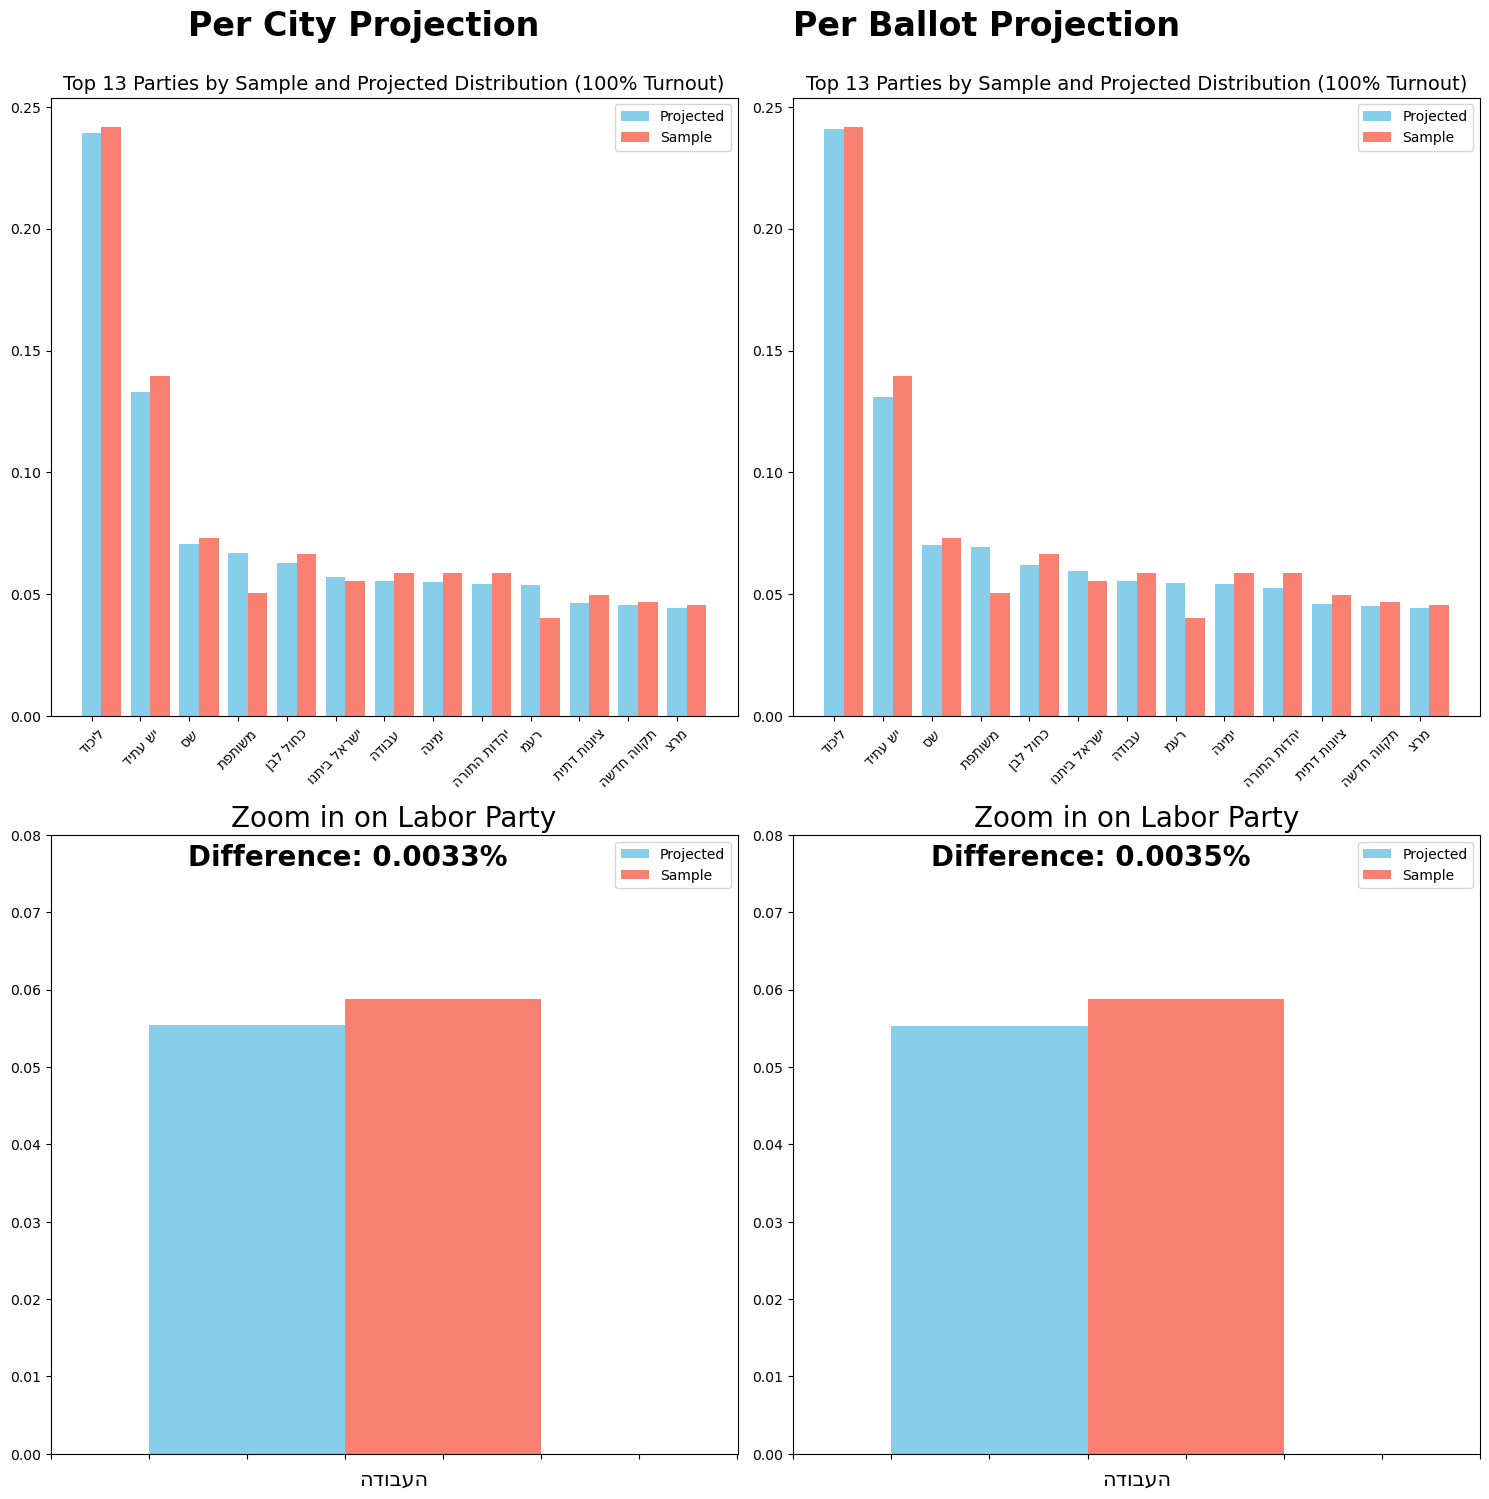

In [179]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Define colors for the bars
color1 = 'skyblue'
color2 = 'salmon'

# Plotting the first subplot
d = {"Projected": city_projected_top_13, "Sample": city_sample_top_13}
d = pd.DataFrame(d)
x1 = range(len(d.index))
y1 = d["Projected"]
x2 = [x + 0.4 for x in x1]
y2 = d["Sample"]

ax[0, 0].bar(x1, y1, width=0.4, label='Projected', color=color1)
ax[0, 0].bar(x2, y2, width=0.4, label='Sample', color=color2)
ax[0, 0].set_xticks(x1)
ax[0, 0].set_xticklabels(d.index, rotation=45)
ax[0, 0].set_title('Top 13 Parties by Sample and Projected Distribution (100% Turnout)', fontsize=14)
ax[0, 0].legend()
ax[0, 0].text(0.2, 1.1, 'Per City Projection', transform=ax[0, 0].transAxes, fontsize=24, fontweight='bold')

# Plotting the second subplot
labor = d.iloc[6]
x1 = 1
y1_2021 = labor["Projected"]
x2 = 1.2
y2_2021 = labor["Sample"]

ax[1, 0].bar(x1, y1_2021, width=0.2, label='Projected', color=color1)
ax[1, 0].bar(x2, y2_2021, width=0.2, label='Sample', color=color2)
diff_city_2021 = round(abs(y1_2021 - y2_2021), 4)
ax[1, 0].text(0.2, 0.95, "Difference: " + str(diff_city_2021) + "%", transform=ax[1, 0].transAxes, fontsize=20, fontweight='bold')
ax[1, 0].set_xticklabels([])
ax[1, 0].set_xlabel('הדובעה', fontsize=15)
ax[1, 0].set_title('Zoom in on Labor Party', fontsize=20)
ax[1, 0].legend()
ax[1, 0].set_xlim(0.8, 1.5)
ax[1, 0].set_ylim(0, 0.08)

# Plotting the third subplot
ballot_d = {"Projected": ballot_top_13_projected, "Sample": ballot_top_13_sample}
ballot_d = pd.DataFrame(ballot_d)
x1 = range(len(ballot_d.index))
y1 = ballot_d["Projected"]
x2 = [x + 0.4 for x in x1]
y2 = ballot_d["Sample"]

ax[0, 1].bar(x1, y1, width=0.4, label='Projected', color=color1)
ax[0, 1].bar(x2, y2, width=0.4, label='Sample', color=color2)
ax[0, 1].set_xticks(x1)
ax[0, 1].set_xticklabels(ballot_d.index, rotation=45)
ax[0, 1].set_title('Top 13 Parties by Sample and Projected Distribution (100% Turnout)', fontsize=14)
ax[0, 1].legend()
ax[0, 1].text(0.0, 1.1, 'Per Ballot Projection', transform=ax[0, 1].transAxes, fontsize=24, fontweight='bold')

# Plotting the fourth subplot
labor = ballot_d.iloc[6]
x1 = 1
z1_2021 = labor["Projected"]
x2 = 1.2
z2_2021 = labor["Sample"]

ax[1, 1].bar(x1, z1_2021, width=0.2, label='Projected', color=color1)
ax[1, 1].bar(x2, z2_2021, width=0.2, label='Sample', color=color2)
ax[1, 1].set_xticklabels([])
ax[1, 1].set_xlabel('הדובעה', fontsize=15)
ax[1, 1].set_title('Zoom in on Labor Party', fontsize=20)
ax[1, 1].legend()
ax[1, 1].set_xlim(0.8, 1.5)
ax[1, 1].set_ylim(0, 0.08)
diff_ballot_2021 = round(abs(z1_2021 - z2_2021), 4)
ax[1, 1].text(0.20, 0.95, "Difference: " + str(diff_ballot_2021) + "%", transform=ax[1, 1].transAxes, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

Here I compared the sample voting percentages with projections based on full voter turnout. 

This comparison involved evaluating both the sample voting data and projections derived from votes at both the polling station and city levels. By projecting 100% voter turnout twice, once at the city level and once at the polling station level, we could assess the consistency of our predictions across both the city level and the ballot level.

Upon examination, it's evident that there is a minimal discrepancies between the two prediction methods concerning the Labor Party's performance. This consistency is apparent in the lower two plots, where the difference between actual and predicted percentages remains negligible.

Using this approach, it appears that the Labor Party effectively mobilized its potential voters in the 2022 elections. The minimal variance between the actual and projected percentages suggests that a significant portion of the party's potential supporters indeed cast their votes.


## Analysis of the 2022 Election

##### (all the code is the same It's just running on 2022 election data )


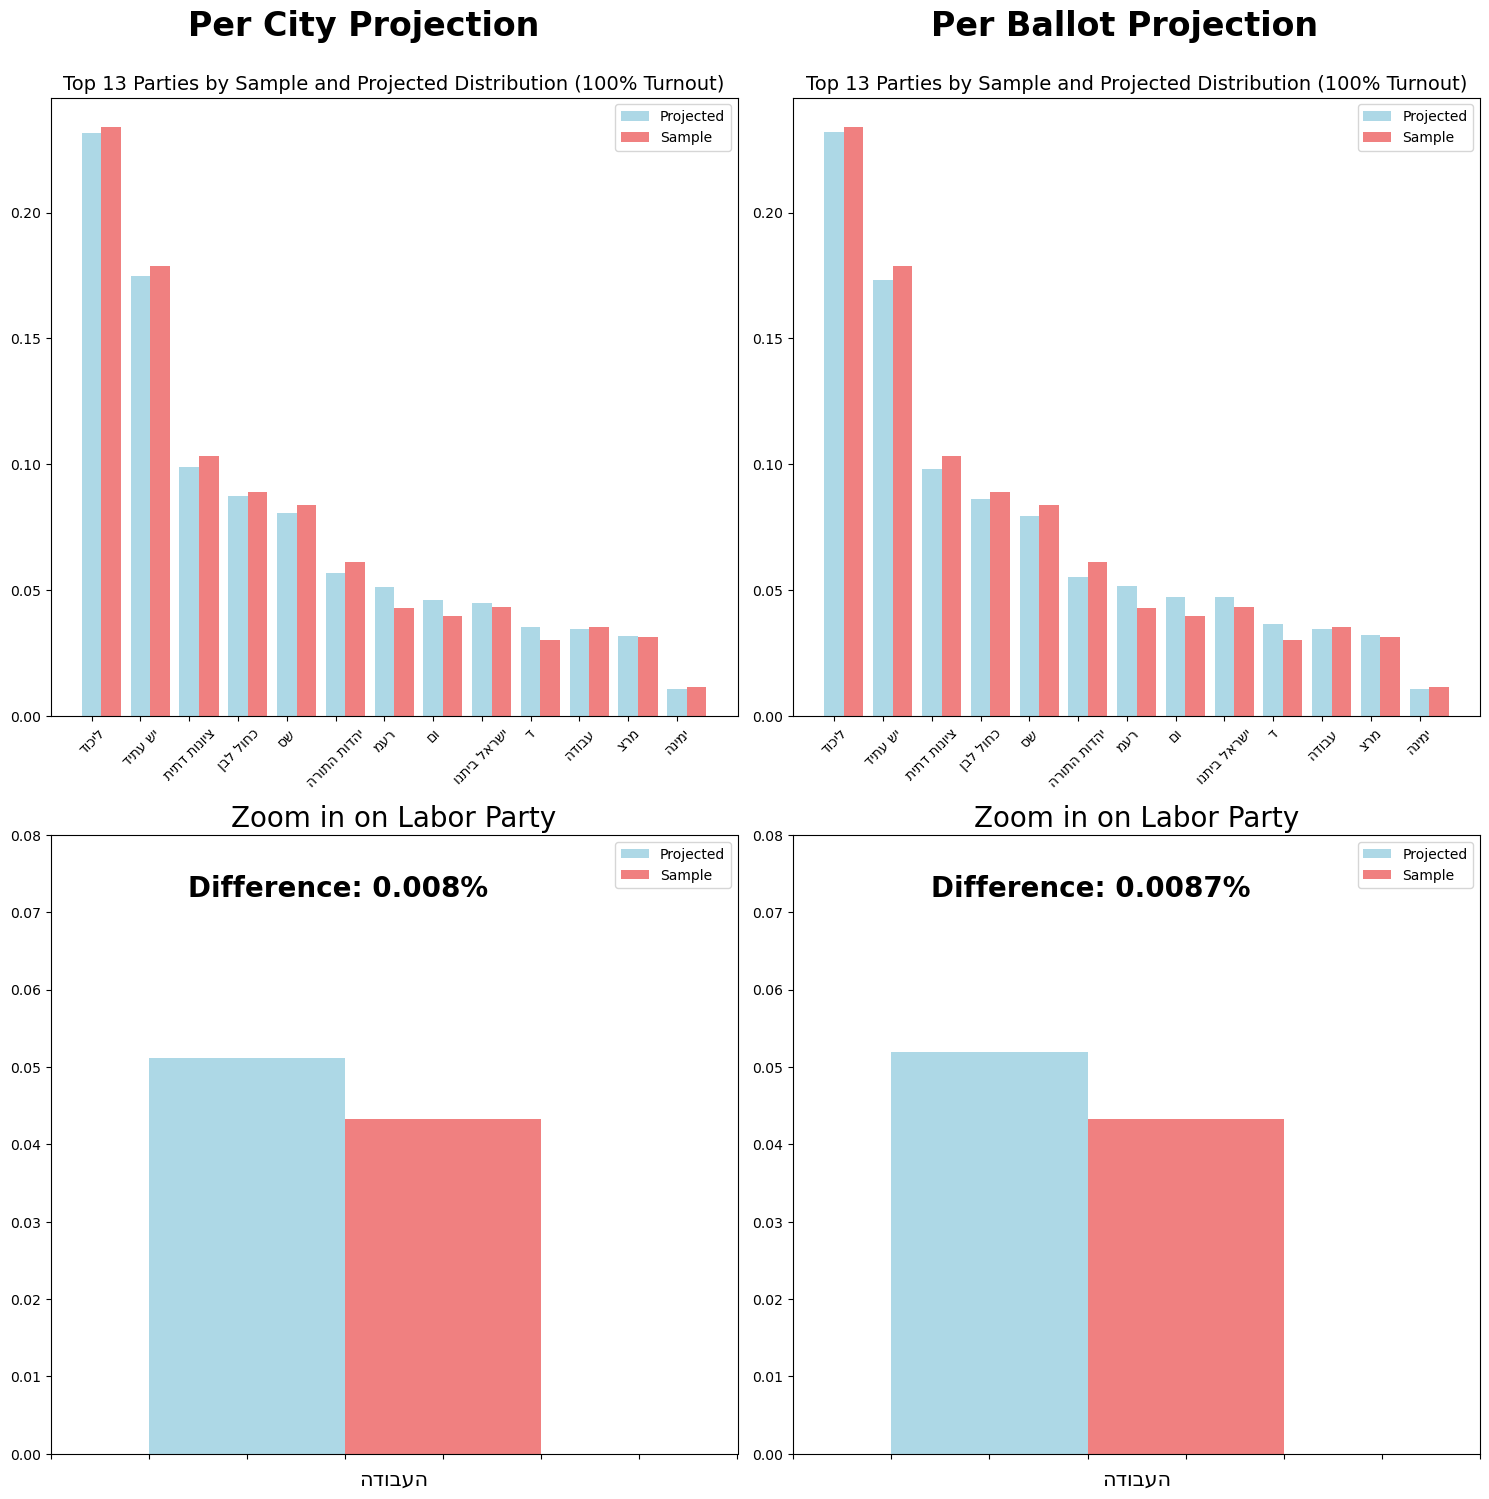

In [180]:
# Load the 2022 city and per-ballot data
per_city_2022 = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\files\votes per city 2022.xlsx")
per_ballot_2022 = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\files\votes per ballot 2022.xlsx")

# Remove non-relevent ballots
per_city_2022 = per_city_2022[per_city_2022["שם ישוב"] != "מעטפות חיצוניות"]
per_ballot_2022 = per_ballot_2022[per_ballot_2022["שם ישוב"] != "מעטפות חיצוניות"]

party_dict = {}
for i in range(len(short_name_list)):
    party_dict[short_name_list[i]] = party_real_name_list[i]
    
# rename party names in data frame 2022
per_city_2022_parties = per_city_2022.iloc[:,7:]
per_city_2022_parties = per_city_2022_parties.rename(columns=party_dict)


# take meta data and calculat precentage of voters per city 
meta_data_vote = per_city_2022.iloc[:,1:5]
meta_data_vote["אחוז מצביעים"] = meta_data_vote["מצביעים"] / meta_data_vote["בזב"]

# Normalize number of votes by voter turnout percentage
for row in range(len(per_city_2022_parties)):
    per_city_2022_parties.iloc[row] = per_city_2022_parties.iloc[row]/meta_data_vote["אחוז מצביעים"].iloc[row]
    
# Calculate the total number of votes
number_of_all_votes = per_city_2022_parties.values.sum()

# Initialize a dictionary to store the percentage of votes for each party
dict_for_pj_all_vote = {}

# Calculate the percentage of votes for each party
for party in per_city_2022_parties.columns:
    # Reverse the party name for readability and store its percentage of votes in the dictionary
    dict_for_pj_all_vote[party[::-1]] = per_city_2022_parties[party].sum() / number_of_all_votes
city_projected_top_13 = dict(sorted(dict_for_pj_all_vote.items(), key=lambda x: x[1], reverse=True)[:13])

votes_real = per_city_2022.iloc[:,7:]
votes_real = votes_real.rename(columns=party_dict)
dict_for_pj_real = {}
number_of_kosher_votes = per_city_2022["כשרים"].sum()
for party in votes_real.columns:
    dict_for_pj_real[party[::-1]] = votes_real[party].sum()/number_of_kosher_votes

# Determine the top 13 parties by sample voting percentages across all cities
city_sample_top_13 = dict(sorted(dict_for_pj_real.items(), key=lambda x: x[1], reverse=True)[:13])

# Normalize per-ballot voting data by voter turnout percentage
per_ballot_2022_parties = per_ballot_2022.iloc[:,11:]
per_ballot_2022_parties = per_ballot_2022_parties.rename(columns=party_dict)
per_ballot_2022["אחוז מצביעים"] = per_ballot_2022["מצביעים"] / per_ballot_2022["בזב"]

for row in range(len(per_ballot_2022_parties)):
    per_ballot_2022_parties.iloc[row] = per_ballot_2022_parties.iloc[row]/per_ballot_2022["אחוז מצביעים"].iloc[row]

# Calculate the total number of votes for per-ballot data
all_votes = per_ballot_2022_parties.values.sum()
dict_all_vote = {}
for party in per_ballot_2022_parties.columns:
    dict_all_vote[party[::-1]] = per_ballot_2022_parties[party].sum()/all_votes

# Determine the top 13 parties by voting percentages in per-ballot data
ballot_top_13_projected = dict(sorted(dict_all_vote.items(), key=lambda x: x[1], reverse=True)[:13])

# Calculate the voting percentages for the Labor Party and other parties based on sample votes
votes_real = per_ballot_2022.iloc[:,11:]
votes_real = votes_real.rename(columns=party_dict)
dict_for_pj_real = {}
number_of_kosher_votes = per_ballot_2022["כשרים"].sum()
for party in votes_real.columns:
    dict_for_pj_real[party[::-1]] = votes_real[party].sum()/number_of_kosher_votes

# Determine the top 13 parties by sample voting percentages across all cities
ballot_top_13_sample = dict(sorted(dict_for_pj_real.items(), key=lambda x: x[1], reverse=True)[:13])

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Define colors for the bars
color1 = 'lightblue'
color2 = 'lightcoral'

# Plotting the first subplot
d = {"Projected": city_projected_top_13, "Sample": city_sample_top_13}
d = pd.DataFrame(d)
x1 = range(len(d.index))
y1 = d["Projected"]
x2 = [x + 0.4 for x in x1]
y2 = d["Sample"]

ax[0, 0].bar(x1, y1, width=0.4, label='Projected', color=color1)
ax[0, 0].bar(x2, y2, width=0.4, label='Sample', color=color2)
ax[0, 0].set_xticks(x1)
ax[0, 0].set_xticklabels(d.index, rotation=45)
ax[0, 0].set_title('Top 13 Parties by Sample and Projected Distribution (100% Turnout)', fontsize=14)
ax[0, 0].legend()
ax[0, 0].text(0.2, 1.1, 'Per City Projection', transform=ax[0, 0].transAxes, fontsize=24, fontweight='bold')

# Plotting the second subplot
labor = d.iloc[6]
x1 = 1
y1_2022 = labor["Projected"]
x2 = 1.2
y2_2022 = labor["Sample"]

ax[1, 0].bar(x1, y1_2022, width=0.2, label='Projected', color=color1)
ax[1, 0].bar(x2, y2_2022, width=0.2, label='Sample', color=color2)
diff_city_2022 = round(abs(y1_2022 - y2_2022), 4)
ax[1, 0].text(0.2, 0.9, "Difference: " + str(diff_city_2022) + "%", transform=ax[1, 0].transAxes, fontsize=20, fontweight='bold')
ax[1, 0].set_xticklabels([])
ax[1, 0].set_xlabel('הדובעה', fontsize=15)
ax[1, 0].set_title('Zoom in on Labor Party', fontsize=20)
ax[1, 0].legend()
ax[1, 0].set_xlim(0.8, 1.5)
ax[1, 0].set_ylim(0, 0.08)

# Plotting the third subplot
ballot_d = {"Projected": ballot_top_13_projected, "Sample": ballot_top_13_sample}
ballot_d = pd.DataFrame(ballot_d)
x1 = range(len(ballot_d.index))
y1 = ballot_d["Projected"]
x2 = [x + 0.4 for x in x1]
y2 = ballot_d["Sample"]

ax[0, 1].bar(x1, y1, width=0.4, label='Projected', color=color1)
ax[0, 1].bar(x2, y2, width=0.4, label='Sample', color=color2)
ax[0, 1].set_xticks(x1)
ax[0, 1].set_xticklabels(ballot_d.index, rotation=45)
ax[0, 1].set_title('Top 13 Parties by Sample and Projected Distribution (100% Turnout)', fontsize=14)
ax[0, 1].legend()
ax[0, 1].text(0.2, 1.1, 'Per Ballot Projection', transform=ax[0, 1].transAxes, fontsize=24, fontweight='bold')

# Plotting the fourth subplot
labor = ballot_d.iloc[6]
x1 = 1
z1_2022 = labor["Projected"]
x2 = 1.2
z2_2022 = labor["Sample"]

ax[1, 1].bar(x1, z1_2022, width=0.2, label='Projected', color=color1)
ax[1, 1].bar(x2, z2_2022, width=0.2, label='Sample', color=color2)
ax[1, 1].set_xticklabels([])
ax[1, 1].set_xlabel('הדובעה', fontsize=15)
ax[1, 1].set_title('Zoom in on Labor Party', fontsize=20)
ax[1, 1].legend()
ax[1, 1].set_xlim(0.8, 1.5)
ax[1, 1].set_ylim(0, 0.08)
diff_ballot_2022 = round(abs(z1_2022 - z2_2022), 4)
ax[1, 1].text(0.2, 0.9, "Difference: " + str(diff_ballot_2022) + "%", transform=ax[1, 1].transAxes, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

When comparing the projected turnout for the Labor Party in 2021 to a hypothetical 100% turnout scenario, we observe that the sample turnout slightly exceeded the projected turnout. Conversely, in the analysis for the year 2022, the projected turnout was marginally higher than the sample turnout.

### Expanding on the Statistical Analysis:

The estimator for 100% voter turnout in each polling station/city and compared it to sample results. This involved normalizing each polling station/city to simulate 100% voter turnout by multiplying the frequency of voting for each party by the number of voters.


### Understanding Voting Patterns through PCA Analysis

In this section, we take a deeper look at voting behavior using PCA, a technique that helps us see patterns in the data.

In [181]:
#import data
echkol = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\files\eshkol_hevrati_calcali.xlsx")
all_data = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\files\votes per ballot 2022.xlsx")
#merge data
join_data = all_data.merge(echkol,left_on = "סמל ישוב", right_on = "set_code", how = "inner")
rating = join_data["eco_level"]
df = join_data.iloc[:,11:51]
nirmul = df.sum(axis=1)
#normalization each party
for ballot in range(11601):
    df.iloc[ballot,:] = df.iloc[ballot,:]/nirmul[ballot]
pca = PCA(n_components=2)
principalComponents = pd.DataFrame(pca.fit_transform(df))
principalComponents.rename(columns = {0:'PC1', 1:'PC2'}, inplace = True)
pca_df = pd.concat([principalComponents,df["אמת"]],axis = 1)

### Polling stations colored by the % of Labor Party votes per ballot for the 2022 elections

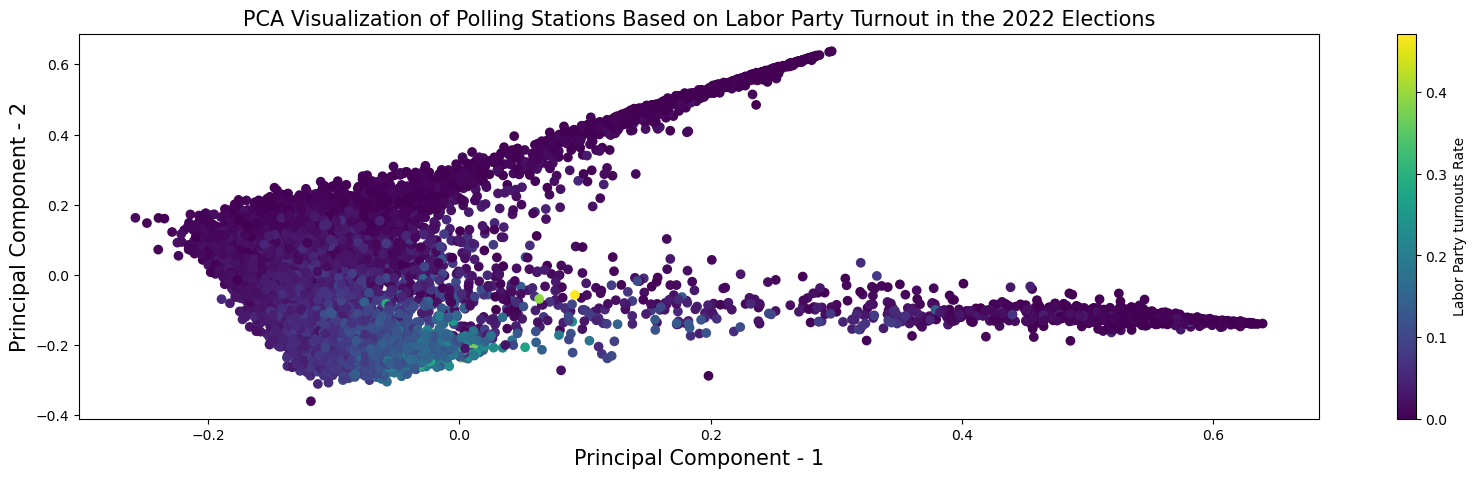

In [182]:
plt.figure(figsize=(20,5))
plt.scatter(pca_df['PC1'],pca_df['PC2'],c=pca_df.iloc[:,2])
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title('PCA Visualization of Polling Stations Based on Labor Party Turnout in the 2022 Elections',fontsize=15)
cbar = plt.colorbar()
cbar.set_label('Labor Party turnouts Rate')

### Polling stations colored by the Socioeconomic Status of the area per ballot for the 2022 elections

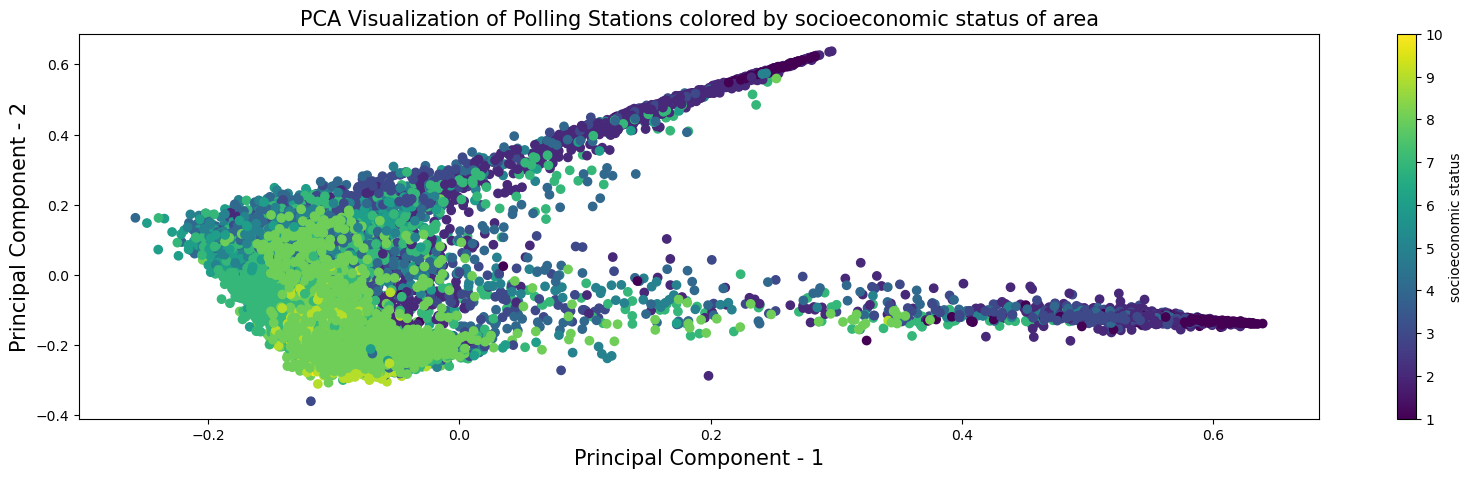

In [183]:
plt.figure(figsize=(20,5))
plt.scatter(pca_df['PC1'],pca_df['PC2'],c=rating)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title('PCA Visualization of Polling Stations colored by socioeconomic status of area',fontsize=15)
cbar = plt.colorbar()
cbar.set_label('socioeconomic status')

This observation suggests that areas with higher Labor Party support also tend to have higher socioeconomic status. This could be because individuals with better economic conditions often align more with the Labor Party's policies and values. It may also reflect greater access to education and information, as well as community influence and quality of life factors

### Tracking Voter Transitions: Analyzing Changes in Party Loyalty

Markov chain theory is utilized here to model the transition of voters between different political parties in successive elections. In a Markov chain, the future state of a system depends only on its current state, not on its past history. In the context of elections, this means that a voter's decision in the current election is independent of their voting history in previous elections, and is solely influenced by their current preferences.

In our case, the transition matrix  $M $ represents the probabilities of voters switching from voting for one party in the first election to voting for another party in the second election. Each entry  $m_{jk} $ in the matrix indicates the probability that a voter who chose party  $j $ in the first election will switch to party  $ k  $ in the second election. This matrix encapsulates the dynamics of voter behavior between the two elections, allowing us to understand how preferences evolve over time.

To calculate this transition matrix from the aggregated data of two elections, we utilize a mathematical approach based on linear algebra. Specifically, we employ the formula:

$ M = (A^T A)^{-1} A^T B $

Where:
- $ A$ represents the aggregated voting data from the first election - the 24th knesset.
- $ B $ represents the aggregated voting data from the second election - the 25th knesset.


the formula for  $ M$ leverages the principles of least squares regression and matrix algebra to estimate the transition probabilities between parties based on observed voting data from two elections, specifically the Moore-Penrose pseudoinverse method.

In [185]:
# Reading the Excel files containing the data for the 2021 and 2022 elections
ballot_21 = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\kalpiot_24.xlsx")
ballot_22 = pd.read_excel(r"C:\Users\uriel\Mabada - Statistics\kalpiot_25.xlsx")

# Pre-processing the data: Removing rows where no one voted
ballot_21 = ballot_21[ballot_21['בזב'] != 0]
ballot_22 = ballot_22[ballot_22['בזב'] != 0]

# Creating lists of the top 13 parties for 2021 and 2022
top13_21 = ["מחל","פה","שס","כן","ב","אמת","ג","ל","ט","ודעם","ת","מרצ","עם"]
top13_22 = ["מחל","פה","שס","כן","ב","אמת","ג","ל","ט","ום","ד","מרצ","עם"]

# Merging the data for the 2021 and 2022 elections on the columns 'סמל ישוב' and 'קלפי'
merge = pd.merge(ballot_21,ballot_22, on =['סמל ישוב','קלפי'])

# Extracting relevant columns for the 2021 and 2022 elections
ballot_21_new = merge.iloc[:,0:51]
ballot_22_new = merge.iloc[:,50:]

# Calculating the number of voters who did not vote for each ballot in both elections
ballot_21_new['בזב שלא הצביעו_x'] = ballot_21_new['בזב_x'] - ballot_21_new['מצביעים_x']
ballot_22_new['בזב שלא הצביעו_y'] = ballot_22_new['בזב_y'] - ballot_22_new['מצביעים_y']

# Selecting specific columns of interest for analysis
ballot_21_new = ballot_21_new[["מחל_x","פה_x","שס_x","כן_x","ב_x","אמת_x","ג_x","ל_x","ט_x","ודעם","ת_x","מרצ_x","עם_x",'בזב שלא הצביעו_x']]
ballot_22_new = ballot_22_new[["מחל_y","פה_y","שס_y","כן_y","ב_y","אמת_y","ג_y","ל_y","ט_y","ום","ד","מרצ_y","עם_y",'בזב שלא הצביעו_y']]

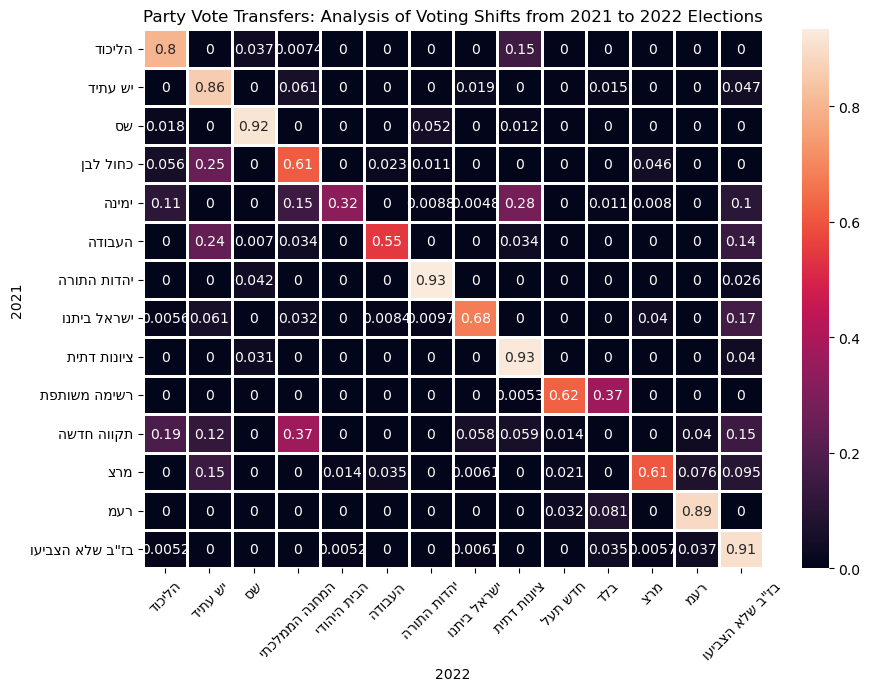

In [186]:
names_21 = ["הליכוד","יש עתיד","שס","כחול לבן","ימינה","העבודה","יהדות התורה","ישראל ביתנו","ציונות דתית","רשימה משותפת","תקווה חדשה","מרצ","רעמ",'בז"ב שלא הצביעו']
names_22 = ["הליכוד","יש עתיד","שס","המחנה הממלכתי","הבית היהודי","העבודה","יהדות התורה","ישראל ביתנו","ציונות דתית","חדש תעל","בלד","מרצ","רעמ",'בז"ב שלא הצביעו']

#now we calculate the matrix
matrix = np.linalg.inv(ballot_21_new.T.dot(ballot_21_new)).dot(ballot_21_new.T).dot(ballot_22_new)
matrix = pd.DataFrame(matrix)
matrix.columns = names_22
matrix.index = names_21

# normalize the matrix
matrix = np.where(matrix < 0.005, 0, matrix)
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
matrix = pd.DataFrame(matrix)
matrix.columns = names_22
matrix.index = names_21

#Plot the heatmap
col_lst = matrix.columns
reversed_col = [x[::-1]for x in col_lst]
row_col = matrix.index
reversed_row = [x[::-1] for x in row_col]
plt.figure(figsize=(10,7))
heat_map = sns.heatmap(matrix, linewidth = 1 , annot = True,xticklabels=reversed_col,yticklabels=reversed_row)
plt.xticks(rotation=45)
plt.title( "Party Vote Transfers: Analysis of Voting Shifts from 2021 to 2022 Elections")
plt.xlabel("2022")
plt.ylabel("2021")
cbar.set_label('% of vote Transfer')
plt.show()

### Transition of Labor Party Voters from the 24th Knesset (2021 Elections) to the 25th Knesset (2022 Elections)

- By looking at out estimation Matrix $M$ we can see that **55%** of voters who chose the Labor Party in 2021 remained loyal and voted for the party again in 2022, signifying a loss of about 45% of its 2021 voters.
- The Labor Party experienced the highest % loss of votes among all parties (excluding Yemina, which did not run in 2022).
- As well as approximately **24%** of Labor Party votes transitioned to the Yesh Atid party in 2022.

These trends might suggest dissatisfaction with recent changes within the party and it might be worth while checking why this trends happend in more debth.


